<a href="https://colab.research.google.com/github/Neuralnomad-hub/Amazon-sales-data-Analysis/blob/main/Amazon_sales_data_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Amazon Sales Data Project:--
Online retail sales is a recently exploded arena wherein businesses connect shops and people at home. Big players of the sector notably Amazon, Flipkart, alibaba etc. get orders day in and out. And there is always a need in a business to keep track of what's going around in their process to assess the performances, which means storing the record of orders or purchases.

Evaluation of performance happens with stats which has to be derived of the stacked data for which some tool is necessary. This is where our project finds it's spotlight.

In here is a sample dataset which is subset of tonnes of real world data. The steps involved in analysing the data such as data extraction, transformation, cleansing, EDA, data visualisation,etc. carried out. Here these processes are carried out using python which is a more reliable and widely used software tool.

Problem Statement:--sales management has gained importance to meet increasing competition and the need for improved methods of distribution to reduce cost and to increase profits. Sales management today is the most important function in a commercial and business enterprise. So they want to do the Extract-Transform-Load some Amazon dataset and find Sales-trend -> month-wise, year-wise, yearly_month-wise for them

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv("Amazon Sales data.csv")
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [4]:
df.columns


Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [6]:
print(df.nunique(axis=0))

Region              7
Country            76
Item Type          12
Sales Channel       2
Order Priority      4
Order Date        100
Order ID          100
Ship Date          99
Units Sold         99
Unit Price         12
Unit Cost          12
Total Revenue     100
Total Cost        100
Total Profit      100
dtype: int64


In [7]:
df.isnull().sum()

,0
Region,0
Country,0
Item Type,0
Sales Channel,0
Order Priority,0
Order Date,0
Order ID,0
Ship Date,0
Units Sold,0
Unit Price,0


In [8]:
df = pd.read_csv("Amazon Sales data.csv")
df[["Order Month", "Order Day", "Order Year"]] = df["Order Date"].str.split('/', expand=True)
df[["Ship Month", "Ship Day", "Ship Year"]] = df["Ship Date"].str.split('/', expand=True)
df.drop(["Order Date", "Ship Date"], axis=1, inplace=True)
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Day,Order Year,Ship Month,Ship Day,Ship Year
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,669165933,9925,255.28,159.42,2533654.00,1582243.50,951410.50,5,28,2010,6,27,2010
1,Central America and the Caribbean,Grenada,Cereal,Online,C,963881480,2804,205.70,117.11,576782.80,328376.44,248406.36,8,22,2012,9,15,2012
2,Europe,Russia,Office Supplies,Offline,L,341417157,1779,651.21,524.96,1158502.59,933903.84,224598.75,5,2,2014,5,8,2014
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,514321792,8102,9.33,6.92,75591.66,56065.84,19525.82,6,20,2014,7,5,2014
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,115456712,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2,1,2013,2,6,2013


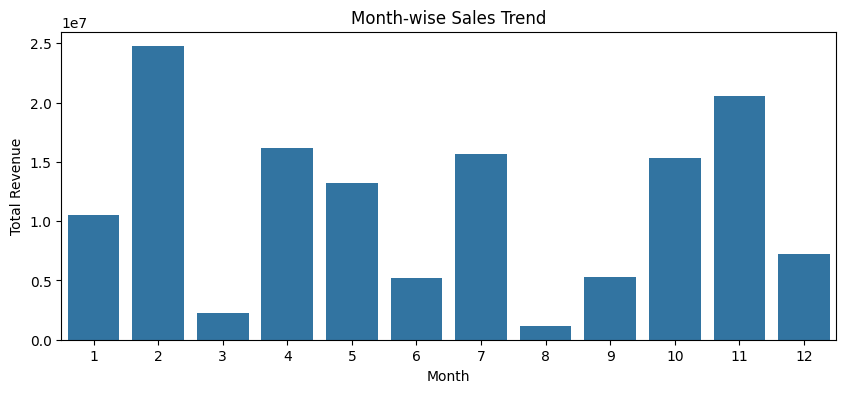

In [9]:
df['Order Month'] = pd.to_numeric(df['Order Month'])
df['Order Year'] = pd.to_numeric(df['Order Year'])

monthly_sales = df.groupby('Order Month')['Total Revenue'].sum().reset_index()
monthly_sales = monthly_sales.sort_values(by='Order Month')

plt.figure(figsize=(10, 4))
sns.barplot(x='Order Month', y='Total Revenue', data=monthly_sales)
plt.title('Month-wise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

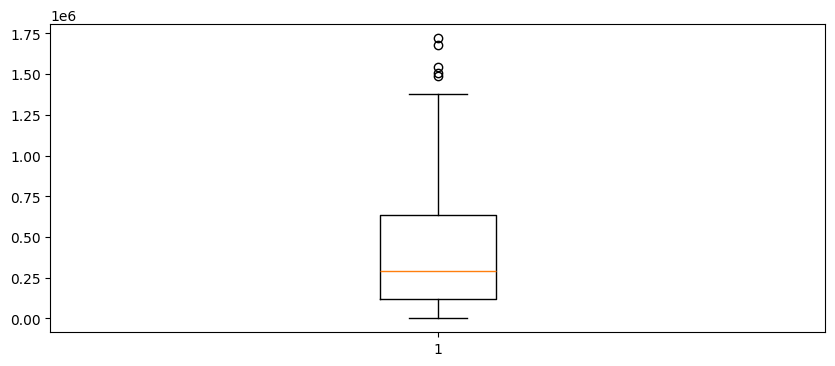

In [11]:
#outlier detections
fig=plt.figure(figsize=(10,4))
plt.boxplot(df['Total Profit'])
plt.show()

In [12]:
l = ['Units Sold',	'Unit Price',	'Unit Cost',	'Total Revenue',	'Total Cost',	'Total Profit']
for i in range(len(l)):
  Q1 = np.percentile(df[l[i]],25)
  Q3 = np.percentile(df[l[i]],75)
  IQR = Q3 - Q1
  upper = (Q3 + 1.5*IQR)
  lower = (Q1 - 1.5*IQR)
  data1 = df[(df[l[i]] < upper) & (df[l[i]] > lower)]
data1.head(3)


,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Day,Order Year,Ship Month,Ship Day,Ship Year
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,669165933,9925,255.28,159.42,2533654.00,1582243.50,951410.50,5,28,2010,6,27,2010
1,Central America and the Caribbean,Grenada,Cereal,Online,C,963881480,2804,205.70,117.11,576782.80,328376.44,248406.36,8,22,2012,9,15,2012
2,Europe,Russia,Office Supplies,Offline,L,341417157,1779,651.21,524.96,1158502.59,933903.84,224598.75,5,2,2014,5,8,2014


In [13]:
data1.shape

(95, 18)

In [15]:
data1.groupby("Region")["Units Sold"].sum().sort_values(ascending=False)

,Units Sold
Region,
Sub-Saharan Africa,182870
Europe,80589
Asia,59967
Australia and Oceania,58671
Middle East and North Africa,38786
Central America and the Caribbean,26797
North America,19143


In [18]:
data1.groupby(["Region", "Item Type"])["Units Sold"].sum()

Region                             Item Type      
Asia                               Clothes            14193
                                   Cosmetics           6952
                                   Fruits              6267
                                   Household          12080
                                   Office Supplies    11718
                                   Personal Care       4901
                                   Vegetables          3856
Australia and Oceania              Baby Food          12899
                                   Beverages          18768
                                   Cereal               682
                                   Clothes             9905
                                   Fruits              7585
                                   Meat                5908
                                   Office Supplies     2924
Central America and the Caribbean  Beverages           8156
                                   Cereal              2804
                                   Clothes             5498
                                   Cosmetics           1705
                                   Personal Care       6409
                                   Snacks              2225
Europe                             Baby Food          22087
                                   Beverages           9784
                                   Clothes            11784
                                   Cosmetics          12572
                                   Household           4795
                                   Office Supplies    14053
                                   Personal Care       5343
                                   Vegetables           171
Middle East and North Africa       Cereal              4063
                                   Clothes            14000
                                   Cosmetics          13723
                                   Fruits              4979
                                   Office Supplies     2021
North America                      Household           6954
                                   Personal Care      12189
Sub-Saharan Africa                 Baby Food           5559
                                   Beverages          20000
                                   Cereal             18328
                                   Clothes            15880
                                   Cosmetics          11692
                                   Fruits             31167
                                   Household          11924
                                   Meat                4767
                                   Office Supplies    16251
                                   Personal Care      19866
                                   Snacks             11412
                                   Vegetables         16024
Name: Units Sold, dtype: int64

In [20]:
data1.groupby("Item Type")[["Units Sold", "Total Profit"]].sum().sort_values(by='Total Profit', ascending=False)

,Units Sold,Total Profit
Item Type,,
Cosmetics,46644,8109992.28
Office Supplies,46967,5929583.75
Household,35753,5925344.69
Clothes,71260,5233334.40
Baby Food,40545,3886643.70
Cereal,25877,2292443.43
Vegetables,20051,1265819.63
Personal Care,48708,1220622.48
Beverages,56708,888047.28


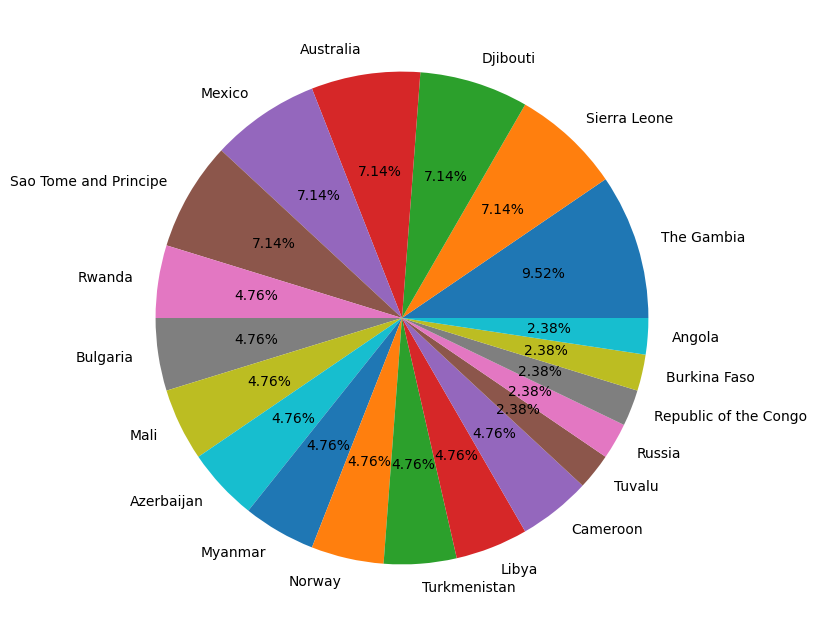

In [22]:
countries = data1.Country.value_counts().index
countries_val = data1.Country.value_counts().values
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(countries_val[:20], labels=countries[:20], autopct="%1.2f%%")
plt.show()

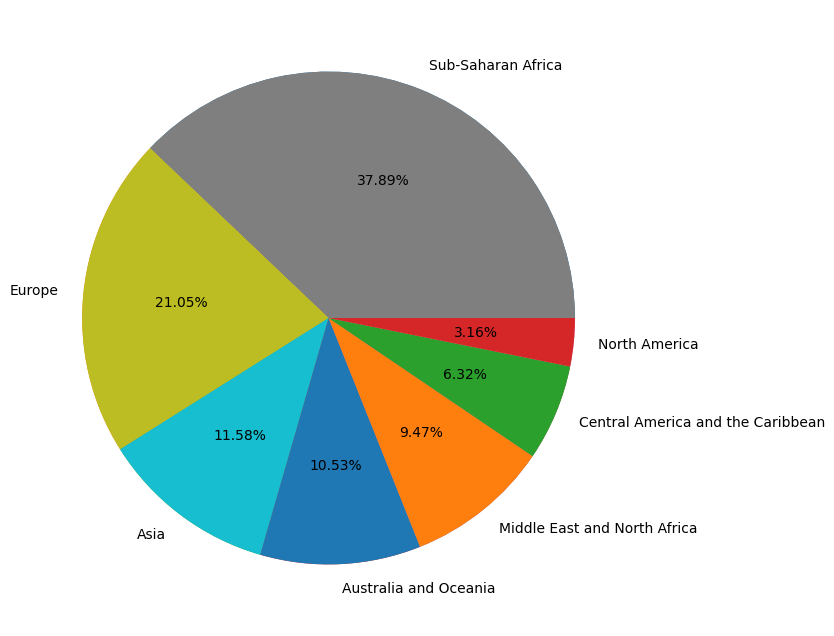

In [23]:
region_names = data1.Region.value_counts().index
region_val = data1.Region.value_counts().values
fix,ax = plt.subplots(figsize=(8,8))
ax.pie(region_val[:20])
ax.pie(region_val[:20],labels= region_names[:20],autopct = '%1.2f%%')
plt.show()



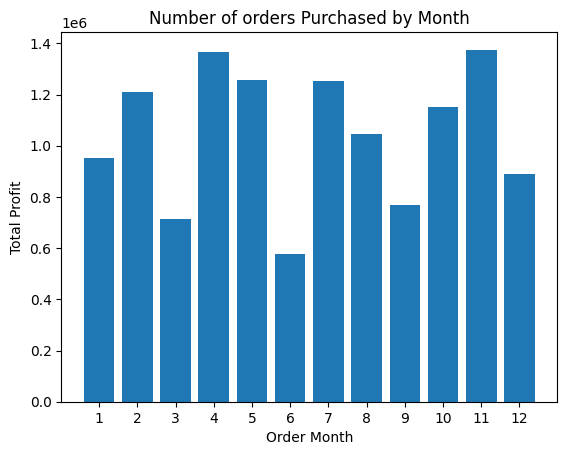

In [24]:
plt.bar(data1['Order Month'].astype(int).sort_values(), data1['Total Profit'])
plt.title("Number of orders Purchased by Month")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.xlabel('Order Month')
plt.ylabel('Total Profit')
plt.show()

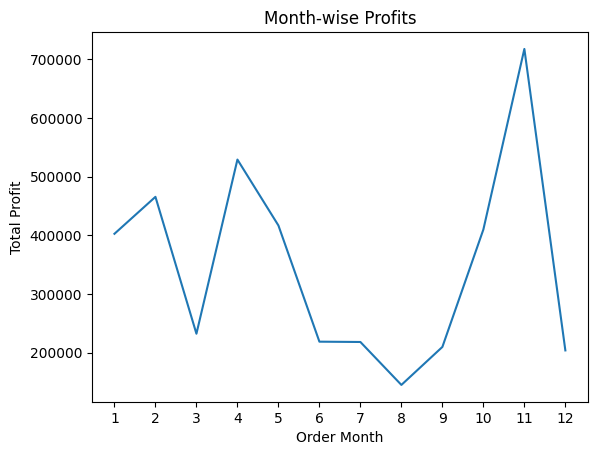

In [25]:
data1.groupby(data1['Order Month'].astype(int).sort_values()) ['Total Profit'].mean().plot()
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.xlabel('Order Month')
plt.ylabel('Total Profit')
plt.title('Month-wise Profits')
plt.show()

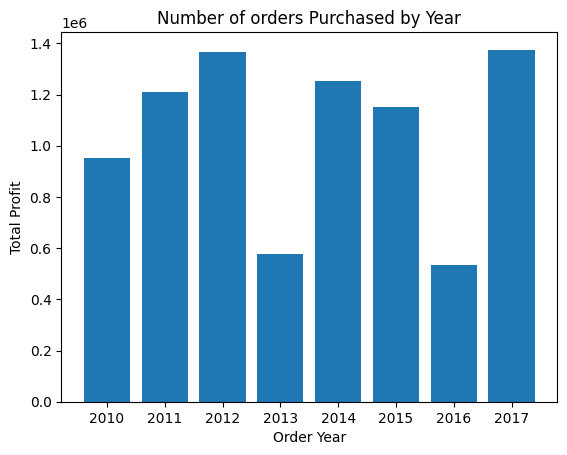

In [26]:
plt.bar(data1['Order Year'].astype(int).sort_values(), data1['Total Profit'])
plt.title("Number of orders Purchased by Year")
plt.xlabel('Order Year')
plt.ylabel('Total Profit')
plt.show()

<Axes: >

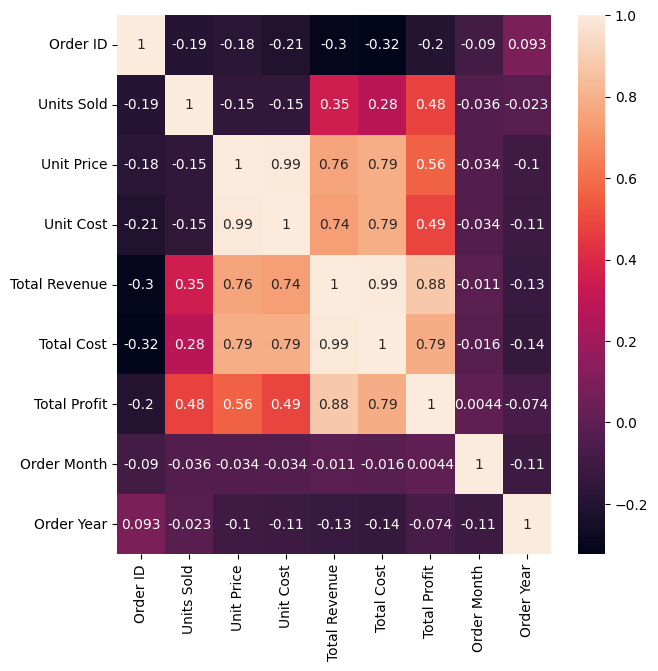

In [28]:
correlation = data1.select_dtypes(include=['number']).corr()
plt.figure(figsize=(7, 7))
sns.heatmap(correlation, xticklabels = correlation.columns, yticklabels = correlation.columns,
            annot = True)